In [1]:
!python tests.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.006s

OK


### 3.3 Метод Ньютона: постоянный шаг vs линейный поиск (2 балла)

In [2]:
import methods
from methods import LBFGS, Newton, BFGS, LBFGS, LineSearchTool
import oracles
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt
import pickle
from sklearn import datasets
from numpy.linalg import norm

In [33]:
def init_oracle(data):
    """Returns logistic regression oracle and feature space dimensionality"""
    A = data[0]
    b = data[1]
    m = A.shape[0]
    n = A.shape[1]
    print(f"m = {m}, n = {n}")
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    return oracle, n

def optimize(oracle, n, line_search_options, tolerance=1e-4, max_iter = 10):
    x0 = np.zeros(n)    
    _, _, history = Newton(oracle, x0, tolerance=tolerance,line_search_options=line_search_options).run(max_iter)
    
    return history
def get_iter_num(history):
    return len(history['func']) - 1

def img_save(img_name):
    "Helper function that saves image in the right format to the right place"
    plt.savefig("images/" + img_name + ".eps", format="eps", dpi=1000)

def make_func_vals_plot(history_gd, history_n, file_pref):
    gd_iter = get_iter_num(history_gd)
    h_iter = get_iter_num(history_n)
    plt.plot(history_gd['time'], history_gd['func'], label="Const, iter = {}".format(gd_iter))
    plt.plot(history_n['time'], history_n['func'], label="Armijo, iter = {}".format(h_iter))
    plt.legend(loc='best')
    plt.xlabel("time(s)")
    plt.ylabel("function value")
    img_save(file_pref + "_function_value")
    plt.show()
    
def make_func_vals_plot_iters(history_gd, history_n, file_pref):
    gd_iter = get_iter_num(history_gd)
    gd_iters = np.arange(gd_iter+1)
    h_iter = get_iter_num(history_n)
    h_iters = np.arange(h_iter+1)
    
    plt.plot(gd_iters, history_gd['func'], label="Const, iter = {}".format(gd_iter))
    plt.plot(h_iters, history_n['func'], label="Wolfe, iter = {}".format(h_iter))
    plt.legend(loc='best')
    plt.xlabel("iter number")
    plt.ylabel("function value")
    img_save(file_pref + "_function_value_iters")
    plt.show()

In [34]:
def run_dataset_experiment(dataset, file_pref, tolerance=1e-8,max_iter=10):    
    st_time = time.time()
    print("Initiating oracle")
    oracle, n = init_oracle(dataset)
    print("Done. Took {} s".format(time.time() - st_time))    
    st_time = time.time()
    print("Starting gradient descent")
    history_grad_descent = optimize(oracle, n, {
                'method': 'Constant',
                'c': 1.0}, tolerance)
    print("Done. Took {} s".format(time.time() - st_time))    
    st_time = time.time()
    print("Starting newton optimization")
    history_newton = optimize(oracle, n, {
                'method': 'Armijo'}, tolerance)
    print("Done. Took {} s".format(time.time() - st_time))    
    make_func_vals_plot(history_grad_descent, history_newton, file_pref)
    make_func_vals_plot_iters(history_grad_descent, history_newton, file_pref)

Initiating oracle
m = 32561, n = 123
Done. Took 0.0 s
Starting gradient descent
Done. Took 0.246018648147583 s
Starting newton optimization
Done. Took 0.30602478981018066 s


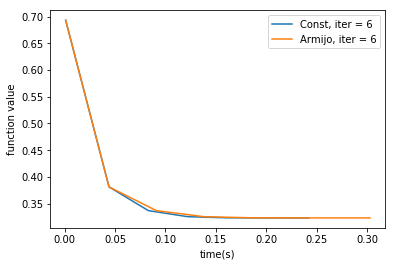

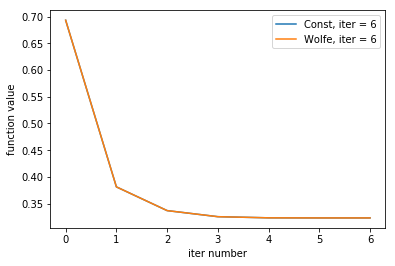

In [35]:
run_dataset_experiment(datasets.load_svmlight_file('data/a9a'),'qwer')

In [ ]:
run_dataset_experiment(datasets.load_svmlight_file('data/gisette_scale'),'qwer')

Initiating oracle
m = 6000, n = 5000
Done. Took 0.0 s
Starting gradient descent
